In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# #Newton's forward propagation method
# def newtons_forward(x, y, x0):
#     n = len(x)
#     if n != len(y):
#         raise ValueError("x and y must have the same length")
    
#     # Creating a divided difference table
#     diff_table = np.zeros((n, n))
#     diff_table[:, 0] = y
    
#     for j in range(1, n):
#         for i in range(n - j):
#             diff_table[i][j] = (diff_table[i + 1][j - 1] - diff_table[i][j - 1])
    
#     #Display the divided difference table
#     diff_table_df = pd.DataFrame(diff_table, columns=[f"delta^{j} y" for j in range(n)], index=x)
#     print("Divided Difference Table:", diff_table_df, sep='\n')
    
#     # Calculate the value at x0 using Newton's forward formula
#     result = diff_table[0][0]
#     p = (x0 - x[0]) / (x[1] - x[0])
#     product_term = 1.0
#     fact = 1.0
#     for j in range(1, n):
#         product_term *=(p - j + 1)
#         fact *= j
#         result += diff_table[0][j] * product_term / fact
    
#     return result

In [47]:
def visualize_newtons_forward(x, y, x0, result, diff_table):
    x_range = np.linspace(min(x), max(x), 500)
    y_interp = []
    h = x[1] - x[0]
    n = len(x)
    for xi in x_range:
        pi = (xi - x[0]) / h
        yi = y[0]
        prod = 1.0
        fact = 1.0
        for j in range(1, n):
            prod *= (pi - (j - 1))
            fact *= j
            yi += (prod * diff_table[0][j]) / fact
        y_interp.append(yi)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x_range, y_interp, label="Interpolated Curve", color='blue')
    plt.plot(x, y, 'o', label="Original Points", color='black')
    plt.plot(x0, result, 'ro', label=f"Interpolated Value at x0 = {x0}")
    plt.axvline(x0, color='r', linestyle='--', linewidth=0.8)
    plt.title("Newton's Forward Interpolation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [54]:
def newtons_forward(x, y, x0, visualize=True):
    n = len(x)
    if n != len(y):
        raise ValueError("x and y must have the same length")
    
    h = x[1] - x[0]
    if not all(np.isclose(x[i+1] - x[i], h) for i in range(n - 1)):
        raise ValueError("x values must be equally spaced for Newton's forward method")
    
    # Creating a forward difference table
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]
    
    # Display the difference table
    diff_table_df = pd.DataFrame(diff_table, columns=[f"Δ^{j}y" for j in range(n)], index=x)
    print("Forward Difference Table:", diff_table_df , sep='\n')
    
    # Compute p
    p = (x0 - x[0]) / h
    
    # Compute interpolated value
    result = y[0]
    product_term = 1.0
    factorial = 1.0
    
    for j in range(1, n):
        product_term *= (p - (j - 1))
        factorial *= j
        result += (product_term * diff_table[0][j]) / factorial

    if visualize:
        visualize_newtons_forward(x, y, x0, result, diff_table)
    
    return result

Forward Difference Table:
   Δ^0y  Δ^1y  Δ^2y  Δ^3y  Δ^4y
1   1.0   3.0   2.0   0.0   0.0
2   4.0   5.0   2.0   0.0   0.0
3   9.0   7.0   2.0   0.0   0.0
4  16.0   9.0   0.0   0.0   0.0
5  25.0   0.0   0.0   0.0   0.0


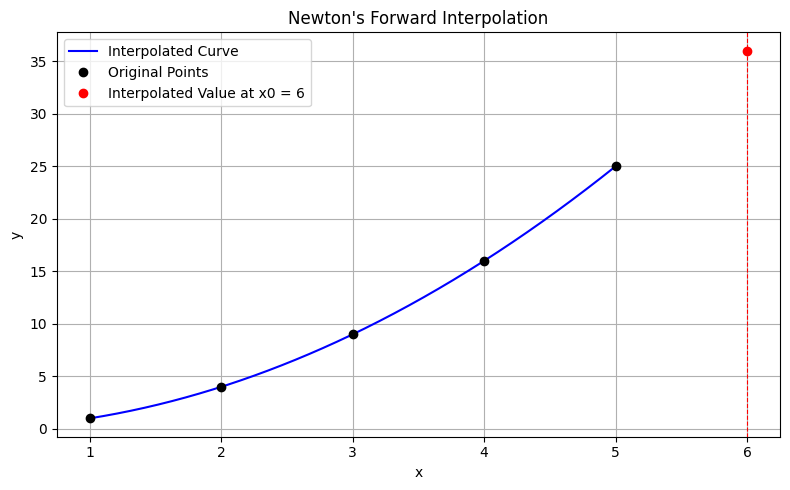

Interpolated value at x0 = 6: 36.0


In [56]:
# Example usage 1 :
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])
x0 = 6
interpolated_y = newtons_forward(x, y, x0)
print(f"Interpolated value at x0 = {x0}: {interpolated_y}")


Forward Difference Table:
   Δ^0y  Δ^1y  Δ^2y  Δ^3y  Δ^4y
0   1.0   1.0   0.0   0.0   0.0
1   2.0   1.0   0.0   0.0   0.0
2   3.0   1.0   0.0   0.0   0.0
3   4.0   1.0   0.0   0.0   0.0
4   5.0   0.0   0.0   0.0   0.0


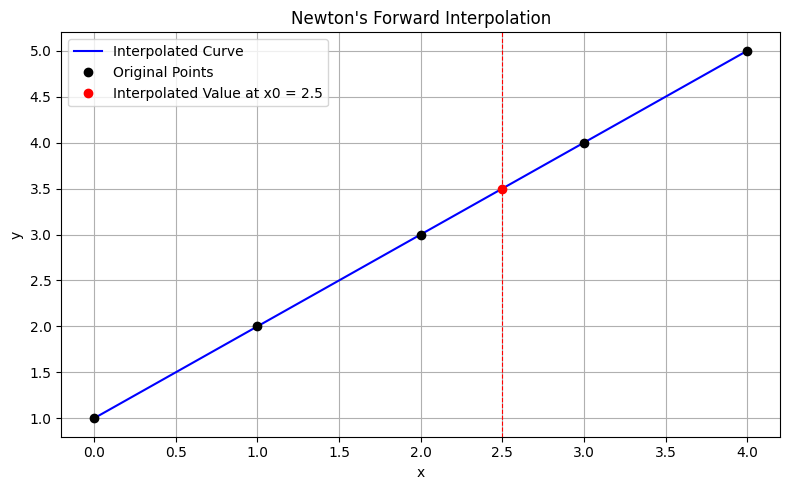

Interpolated value at x0 = 2.5: 3.5


In [55]:
# Example usage 2:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 3, 4, 5])
x0 = 2.5
interpolated_y = newtons_forward(x, y, x0)
print(f"Interpolated value at x0 = {x0}: {interpolated_y}")

Forward Difference Table:
   Δ^0y  Δ^1y  Δ^2y  Δ^3y  Δ^4y
0   1.0   2.0   0.0   0.0   0.0
1   3.0   2.0   0.0   0.0   0.0
2   5.0   2.0   0.0   0.0   0.0
3   7.0   2.0   0.0   0.0   0.0
4   9.0   0.0   0.0   0.0   0.0


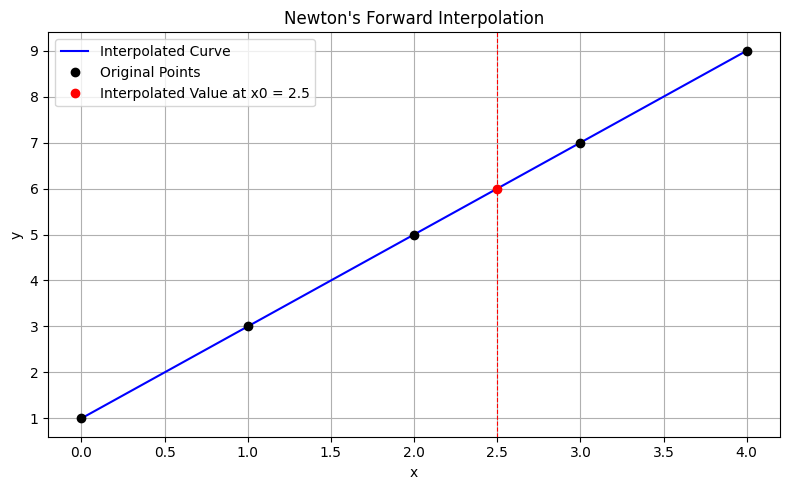

Interpolated value at x0 = 2.5: 6.0


In [57]:
# Example usage 3:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9])
x0 = 2.5
interpolated_y = newtons_forward(x, y, x0)
print(f"Interpolated value at x0 = {x0}: {interpolated_y}")